In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import shapiro, kstest

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("files/merchant_fill_nonulls.csv", index_col = 0)
df.head(2)

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0


In [6]:
# 1. La variable 2price2 representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. 
# Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

print(f"El precio medio es de {np.round(df['price'].mean(), 2)}")
print(f"La mediana del precio es {df['price'].median()}")

El precio medio es de 8.33
La mediana del precio es 8.0


In [10]:
# 2. Crea una tabla de correlación que muestre cómo se relacionan las variables "price", "retail_price", "units_sold", "rating_sold", y "rating_count". 
# Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.
lista =  ["price", "retail_price", "units_sold", "rating_sold",  "rating_count"]

combinaciones = list(combinations(lista, 2))


def identificar_linealidad (dataframe, lista_combinacion_columnas):

    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales


lineal, no_lineal = identificar_linealidad(df, combinaciones )

In [13]:
df_correlacion = df[lista]
df_correlacion.head()

,price,retail_price,units_sold,rating_sold,rating_count
0,16.00,14,100,3.76,54
1,8.00,22,20000,3.45,6135
2,4.90,8,1000,3.83,99
3,4.93,6,100,3.77,47
4,5.65,10,100,2.86,7


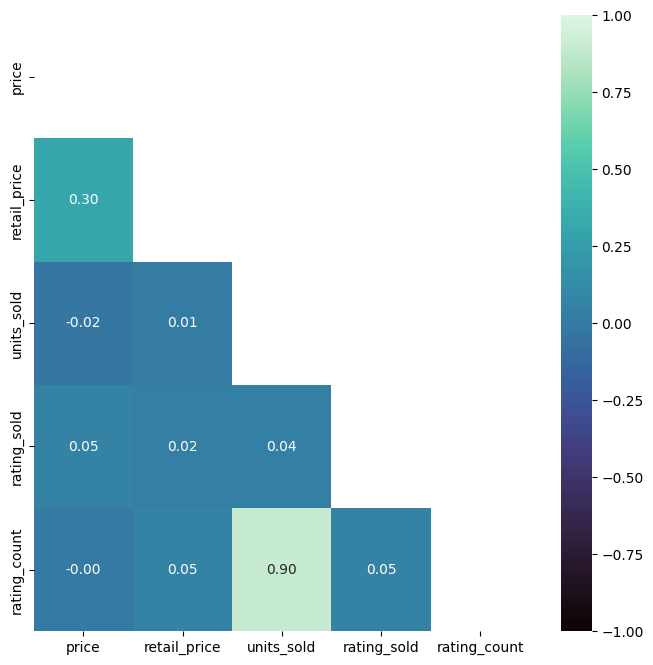

In [17]:
plt.figure(figsize = (8, 8))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlacion.corr(numeric_only=True), dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlacion.corr(numeric_only=True), 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


In [20]:
# 3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas "uses_ad_boosts" y "badge_product_quality". ¿Cómo afecta la calidad del producto al uso de anuncios promocionales?
# Proporciona interpretaciones basadas en la tabla de contingencia.

df_contingencia = df[["uses_ad_boosts" , "badge_product_quality"]]
pd.crosstab(df_contingencia["uses_ad_boosts"], df_contingencia["badge_product_quality"], normalize=True)

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,0.525111,0.041958
Si,0.400509,0.032422


In [21]:
# 4. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `badge_fast_shipping`. 
# ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.
pd.crosstab(df["badge_local_product"], df["badge_fast_shipping"], normalize=True)

badge_fast_shipping,No,Si
badge_local_product,,
No,0.974571,0.006993
Si,0.012715,0.005722


In [23]:
# 5. Calcula la media y la mediana de la variable `mean_product_prices`.
# ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

print(f"El precio medio es de {np.round(df['mean_product_prices'].mean(), 2)}")
print(f"La mediana del precio es {df['mean_product_prices'].median()}")

El precio medio es de 8.33
La mediana del precio es 8.0


In [24]:
# 6. Realiza un análisis de correlación entre `total_units_sold` y `mean_product_ratings_count`. 
# ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

df[["total_units_sold", "mean_product_ratings_count"]].corr("spearman")


,total_units_sold,mean_product_ratings_count
total_units_sold,1.000000,0.875353
mean_product_ratings_count,0.875353,1.000000


In [27]:
# 7. Crea una tabla de contingencia que examine la relación entre las variables categóricas `badge_local_product` y `seller_reputation`. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? 
# Proporciona interpretaciones basadas en la tabla de contingencia.

pd.crosstab(df["badge_local_product"],df["seller_reputation"] )

seller_reputation,Buena,Regular
badge_local_product,,
No,904,640
Si,27,2


In [28]:
# 8. Calcula la media y la mediana de la variable `discount_percentage`. 
# ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

print(f"El precio medio es de {np.round(df['discount_percentage'].mean(), 2)}")
print(f"La mediana del precio es {df['discount_percentage'].median()}")

El precio medio es de -26.06
La mediana del precio es -5.83


In [31]:
df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


In [34]:
# 9. Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas `seller_reputation` y `badge_fast_shipping`. 
# ¿Qué puedes concluir sobre la distribución de las calificaciones altas? 
pd.crosstab(df["badge_fast_shipping"], df["seller_reputation"], normalize=True)



seller_reputation,Buena,Regular
badge_fast_shipping,,
No,0.581691,0.405594
Si,0.010172,0.002543
